In [2]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import pandas as pd

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Data Visualization and Analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/13 23:59:49 INFO SparkEnv: Registering MapOutputTracker
24/05/13 23:59:49 INFO SparkEnv: Registering BlockManagerMaster
24/05/13 23:59:49 INFO SparkEnv: Registering BlockManagerMasterHeartbeat
24/05/13 23:59:49 INFO SparkEnv: Registering OutputCommitCoordinator


In [4]:
trusted_data_path = "gs://my-project-bucket-ls/trusted/*.parquet"
trusted_df = spark.read.parquet(trusted_data_path)


In [5]:
from pyspark.ml import PipelineModel

model_path = "gs://my-project-bucket-ls/models/stock_price_model"
loaded_model = PipelineModel.load(model_path)


24/05/13 23:14:47 WARN YarnScheduler: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
24/05/13 23:15:02 WARN YarnScheduler: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
24/05/13 23:15:17 WARN YarnScheduler: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
24/05/13 23:15:32 WARN YarnScheduler: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
24/05/13 23:15:47 WARN YarnScheduler: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
24/05/13 23:16:02 WARN YarnScheduler: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registere

24/05/13 23:26:47 WARN YarnScheduler: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
24/05/13 23:27:02 WARN YarnScheduler: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
24/05/13 23:27:17 WARN YarnScheduler: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
24/05/13 23:27:32 WARN YarnScheduler: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
24/05/13 23:27:47 WARN YarnScheduler: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
24/05/13 23:28:02 WARN YarnScheduler: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registere

KeyboardInterrupt: 

In [5]:
from google.cloud import storage
import pandas as pd
import pyarrow.parquet as pq
import pyarrow as pa
from io import BytesIO

client = storage.Client()

bucket_name = 'my-project-bucket-ls'
bucket = client.get_bucket(bucket_name)

directory_name = 'trusted/'

blobs = bucket.list_blobs(prefix=directory_name)

data_frames = []
for blob in blobs:
    if blob.name.endswith('.parquet'):
        byte_stream = BytesIO()
        blob.download_to_file(byte_stream)
        byte_stream.seek(0)
        
        data_frames.append(pq.read_table(byte_stream).to_pandas())

if data_frames:
    df = pd.concat(data_frames, ignore_index=True)
    print(df.head()) 
else:
    print("No parquet files found.")




     datetime   open   high    low  close   volume  bbands_20_upperband  \
0  2001-08-16  49.60  50.20  49.30  50.00  1358000                53.03   
1  2001-08-17  49.99  49.99  49.39  49.57  1603100                52.42   
2  2001-08-20  49.61  50.25  49.40  50.07  1272200                52.10   
3  2001-08-21  50.25  51.99  50.10  50.89  1709300                52.03   
4  2001-08-22  51.10  51.57  50.71  51.12   959600                51.94   

   bbands_20_middleband  bbands_20_lowerband  dema_20  ...  tema_60  adx_20  \
0                 49.74                46.45    48.49  ...    48.97   21.73   
1                 49.56                46.70    48.58  ...    48.93   21.35   
2                 49.46                46.81    48.76  ...    48.95   20.84   
3                 49.44                46.85    49.06  ...    49.04   20.11   
4                 49.42                46.89    49.37  ...    49.16   19.42   

   adx_60  macd_20_40_10_macd  macd_60_120_30_macd  rsi_20  rsi_60  \
0   

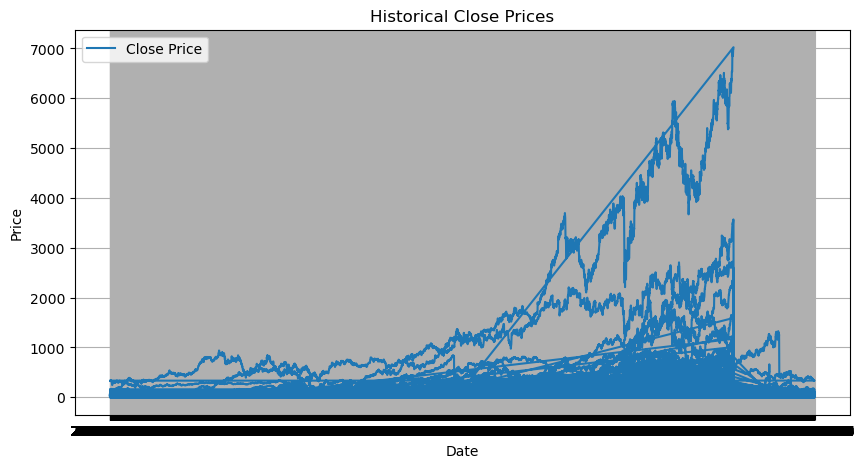

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 5))
plt.plot(df['datetime'], df['close'], label='Close Price')
plt.title('Historical Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


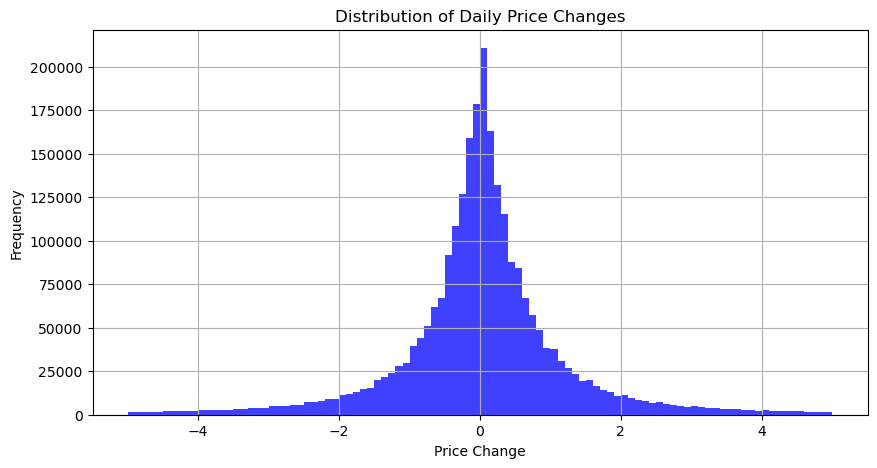

In [34]:
import matplotlib.pyplot as plt
import pandas as pd


df['price_change'] = df['close'].diff()

plt.figure(figsize=(10, 5))
plt.hist(df['price_change'].dropna(), bins=100, range=(-5,5), alpha=0.75, color='blue')
plt.title('Distribution of Daily Price Changes')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




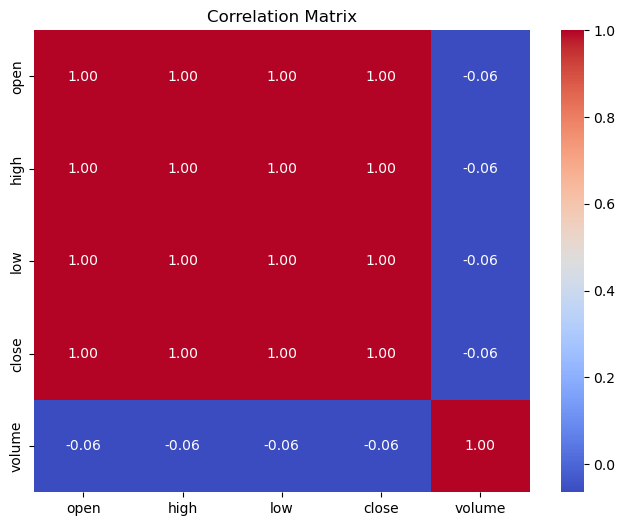

In [8]:
import seaborn as sns

corr = df[['open', 'high', 'low', 'close', 'volume']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


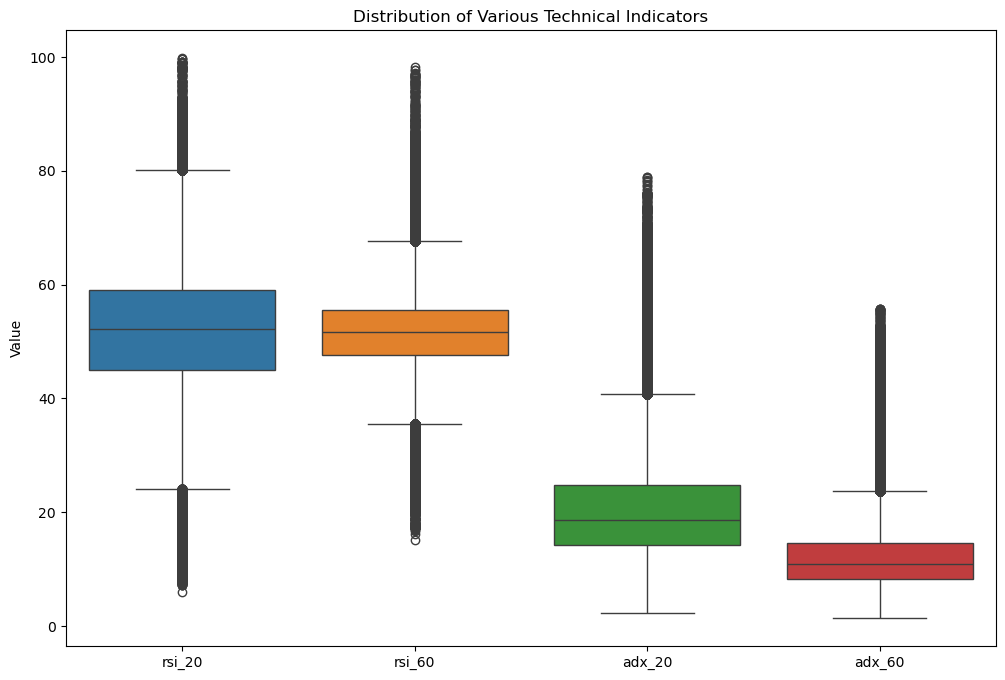

In [9]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['rsi_20', 'rsi_60', 'adx_20', 'adx_60']])
plt.title('Distribution of Various Technical Indicators')
plt.ylabel('Value')
plt.show()


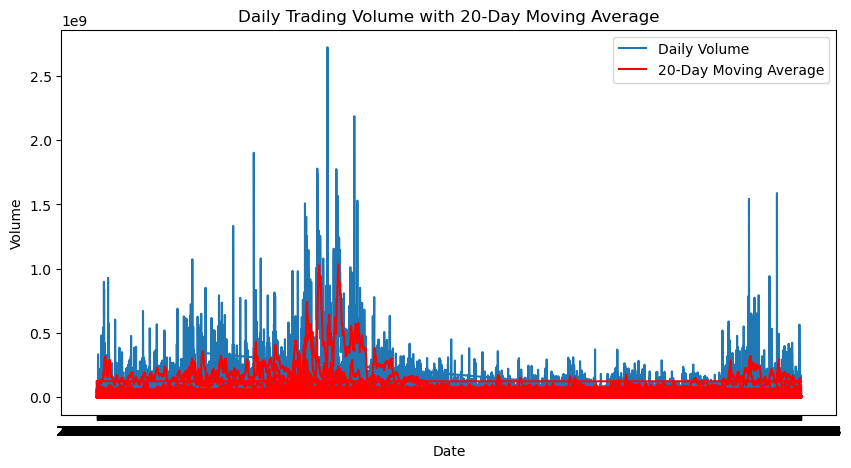

In [12]:
df['volume_ma'] = df['volume'].rolling(window=20).mean() 
plt.figure(figsize=(10, 5))
plt.plot(df['datetime'], df['volume'], label='Daily Volume')
plt.plot(df['datetime'], df['volume_ma'], label='20-Day Moving Average', color='red')
plt.title('Daily Trading Volume with 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


In [11]:
print(df.columns)


Index(['datetime', 'open', 'high', 'low', 'close', 'volume',
       'bbands_20_upperband', 'bbands_20_middleband', 'bbands_20_lowerband',
       'dema_20', 'ema_20', 'ema_60', 'kama_20', 'kama_60', 'ma_20', 'ma_60',
       'sma_20', 'sma_60', 'tema_20', 'tema_60', 'adx_20', 'adx_60',
       'macd_20_40_10_macd', 'macd_60_120_30_macd', 'rsi_20', 'rsi_60',
       'file_path', 'symbol', 'next_day_close', 'price_change', 'volume_ma'],
      dtype='object')


In [18]:
df['month'] = df['datetime'].dt.to_period('M')
monthly_volume = df.groupby('month')['volume'].sum()

print(monthly_volume)


month
1998-09     5410898837
1998-10    12290487650
1998-11     9838119871
1998-12    11002455116
1999-01    15669617314
              ...     
2023-08    35474172558
2023-09    33281995342
2023-10    39857701717
2023-11    34694884466
2023-12    33505943078
Freq: M, Name: volume, Length: 304, dtype: int64


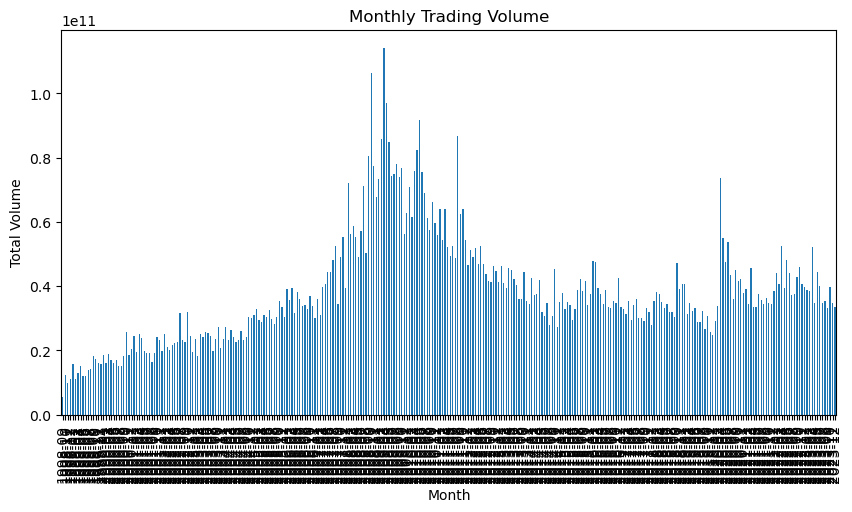

In [19]:
import matplotlib.pyplot as plt

monthly_volume.plot(kind='bar', figsize=(10, 5))
plt.title('Monthly Trading Volume')
plt.xlabel('Month')
plt.ylabel('Total Volume')
plt.xticks(rotation=90) 
plt.show()
